<a href="https://colab.research.google.com/github/XeyaleVeliyeva/Machine-learning/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r'C:\Users\compo1022\Desktop\DS-128\ML-128\insurance\insurance_with_nulls.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,NaN,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1271 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1271 non-null   float64
 3   children  1271 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isna().sum()

age         67
sex          0
bmi         67
children    67
smoker       0
region       0
charges      0
dtype: int64

In [ ]:
import numpy as np
df['age'] = df['age'].fillna(df['age'].median())

In [ ]:
df.isna().sum()

age          0
sex          0
bmi         67
children    67
smoker       0
region       0
charges      0
dtype: int64

In [ ]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['children'] = df['children'].fillna(df['children'].median())

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df['sex']  = df['sex'].map({'male':0,'female':1})
df['sex']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex, Length: 1338, dtype: int64

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,1,27.900,0.0,yes,southwest,16884.92400
1,18.0,0,33.770,1.0,no,southeast,1725.55230
2,28.0,0,33.000,3.0,no,southeast,4449.46200
3,33.0,0,22.705,0.0,no,northwest,21984.47061
4,32.0,0,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,0,30.970,3.0,no,northwest,10600.54830
1334,18.0,1,31.920,0.0,no,northeast,2205.98080
1335,39.0,1,36.850,0.0,no,southeast,1629.83350
1336,21.0,1,25.800,0.0,no,southwest,2007.94500


In [ ]:
df['smoker']  = df['smoker'].map({'no':0,'yes':1})
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['region'] = le.fit_transform(df['region'])

In [ ]:
df['region']

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int64

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,1,27.900,0.0,1,3,16884.92400
1,18.0,0,33.770,1.0,0,2,1725.55230
2,28.0,0,33.000,3.0,0,2,4449.46200
3,33.0,0,22.705,0.0,0,1,21984.47061
4,32.0,0,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,0,30.970,3.0,0,1,10600.54830
1334,18.0,1,31.920,0.0,0,0,2205.98080
1335,39.0,1,36.850,0.0,0,2,1629.83350
1336,21.0,1,25.800,0.0,0,3,2007.94500


<Axes: >

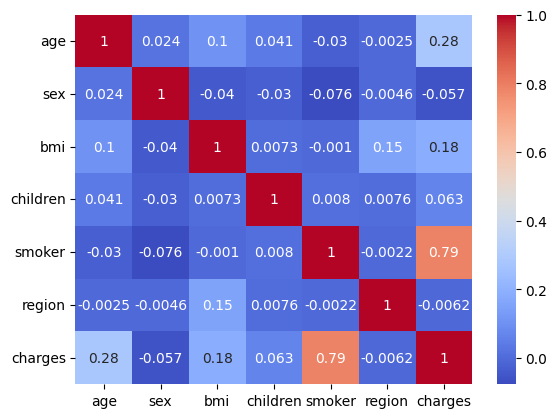

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
df.drop('region',axis=1,inplace=True)

In [ ]:
df.drop('sex',axis=1,inplace=True)

In [ ]:
# from scipy.stats import zscore
# import numpy as np
# num_cols = df.select_dtypes(include=np.number).columns
# for cols in num_cols:
#     z_scores = np.abs(zscore(df[cols]))
#     outliers = df[z_scores > 3]
#     print(cols, ":", len(outliers), "outliers")

# df=df[(np.abs(zscore(df[num_cols])) < 3).all(axis=1)]

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('charges',axis=1)
y = df['charges']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(X_train,y_train)
ln.score(X_test,y_test)

0.7689231500950802